## Popular Data Science Questions
### Guided Project - Dataquest

We are working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms. Our goal is to figure out what is best content to write about.

Given the lack of instructions there's some leeway in what "best" means."What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

### Stack Exchange

[Stack Exchange](https://stackexchange.com/) hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. 
It employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

There are different Stack Exchange websites. We are going to focus on [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com/).


**What kind of questions are welcome on this site?**

We can check the questions with highest scores as *What are deconvolutional layers?*, 
*Micro Average vs Macro average Performance in a Multiclass classification setting* or *How to set class weights for imbalanced classes in Keras?*.

We can also see the most frequent questions as *K-Means clustering for mixed numeric and categorical data*, *How to set the number of neurons and layers in neural networks* or *How to get correlation between two categorical variable and a categorical variable and continuous variable?*

If we check the more popular tags, there are questions about machine learning, pyhton, deep learning or neural network.

**What, other than questions, does the site's home subdivide into?**

We can check tags, users and companies content.

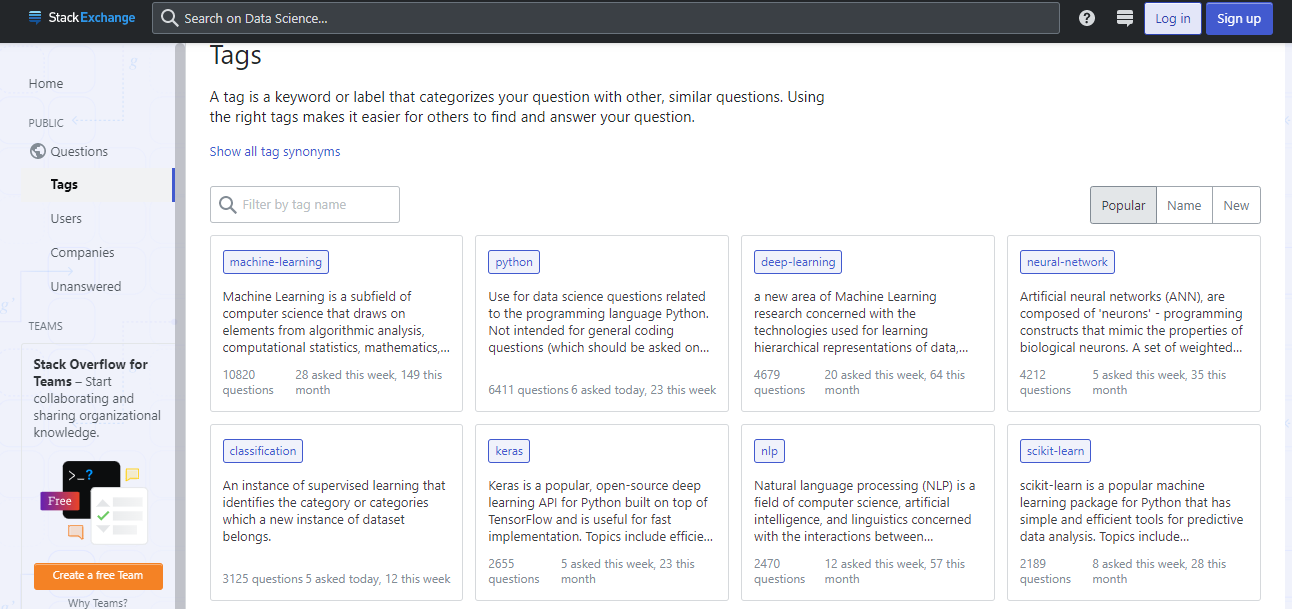

**Does any of them look useful towards our goal?**

We can see that users wants to know the answers to HOW and WHAT questions. There also information about popularity (number of votes, answers, frequency)

**What information is available in each post?**

Each post show the title question, date of creation and modification, number of viewed, difference bewtween up and down votes, description of the question, tags and user.
We can also see the answers by other users and their votes.

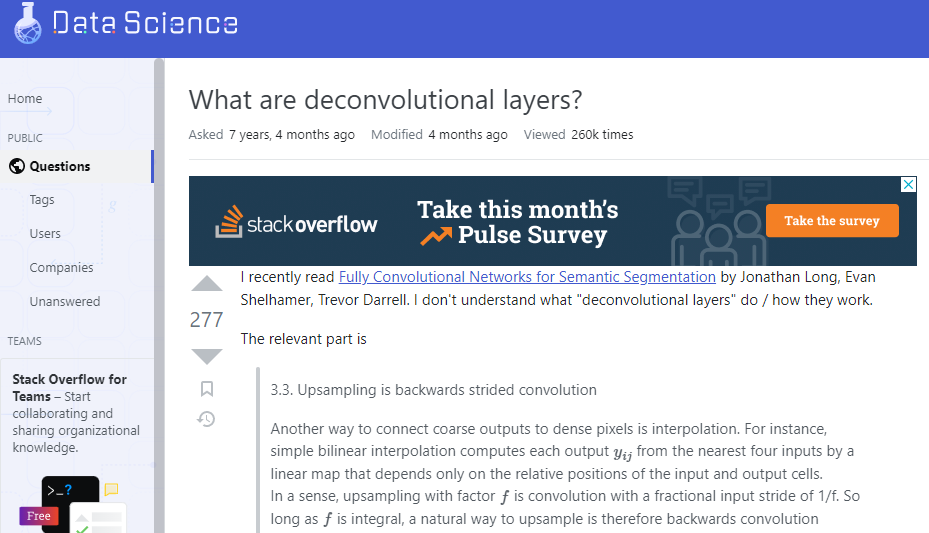
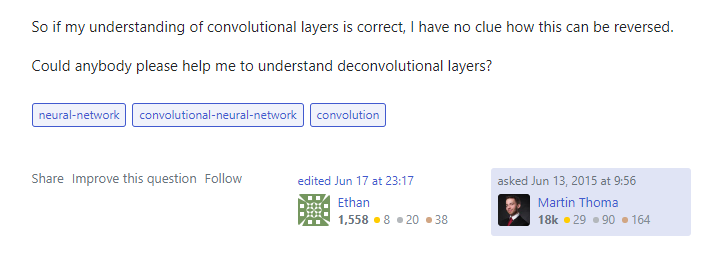
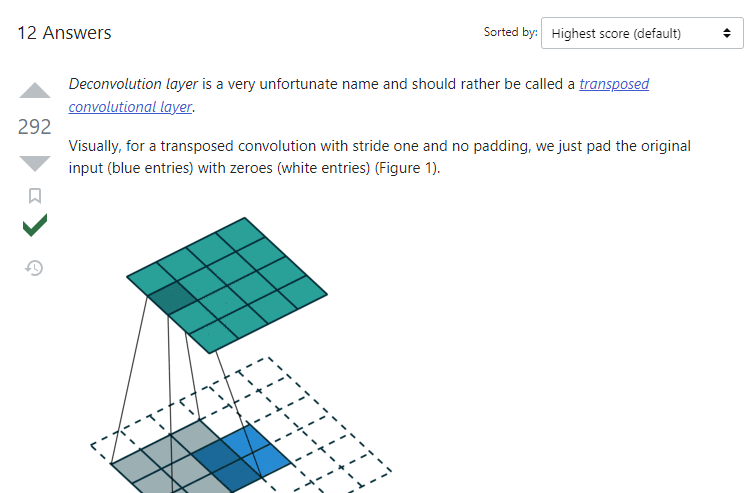

### Stack Exchange Data Explorer

Tags will be very useful in categorizing content.

**How to access the data en masse?**
Stack Exchange provides a public data base for each of its websites. Here's a link to query and explore [Data Science Stack Exchange's database](https://data.stackexchange.com/datascience/query/new).

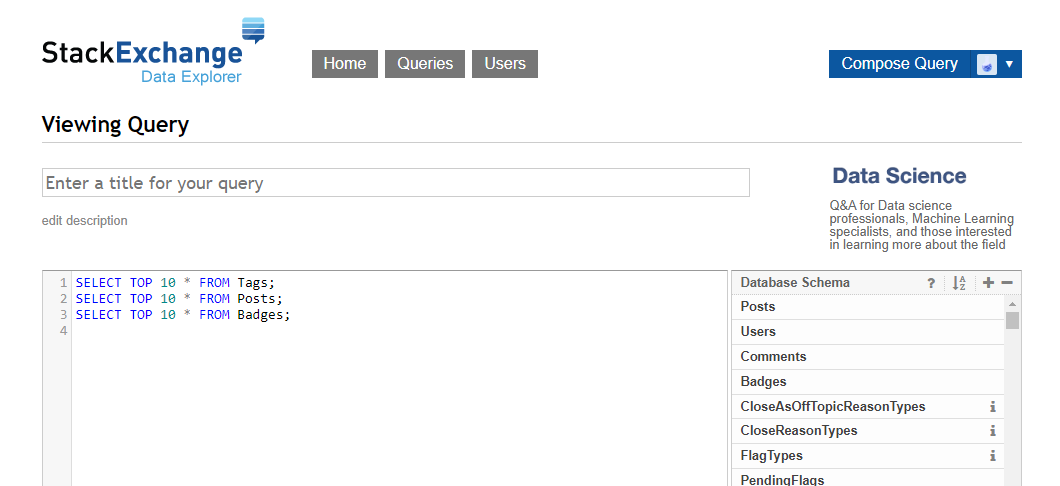
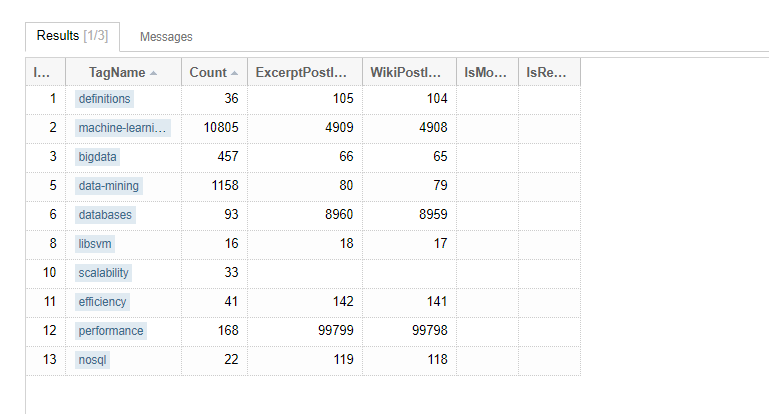

### Getting the data

We are going to use the Posts table which has a lot of columns as:

- `Id`: An identification number for the post.
- `PostTypeId`: An identification number for the type of post.
- `CreationDate`: The date and time of creation of the post.
- `Score`: The post's score.
- `ViewCount`: How many times the post was viewed.
- `Tags`: What tags were used.
- `AnswerCount`: How many answers the question got (only applicable to question posts).
- `FavoriteCount`: How many times the question was favored (only applicable to question posts).

The last few columns contain information about how popular the post is — the kind of information we're after.

There are eight different types of post:

*SELECT PostTypeId, COUNT(*) as NrOfPosts
  FROM posts
 GROUP BY PostTypeId;*

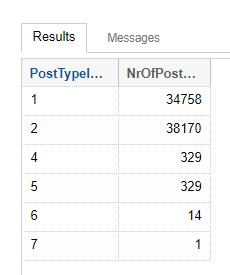

*SELECT * FROM PostTypes*

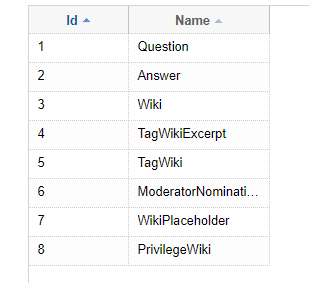


Anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019.

*SELECT Id, 
       PostTypeId,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
  FROM Posts
  WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019*
  
  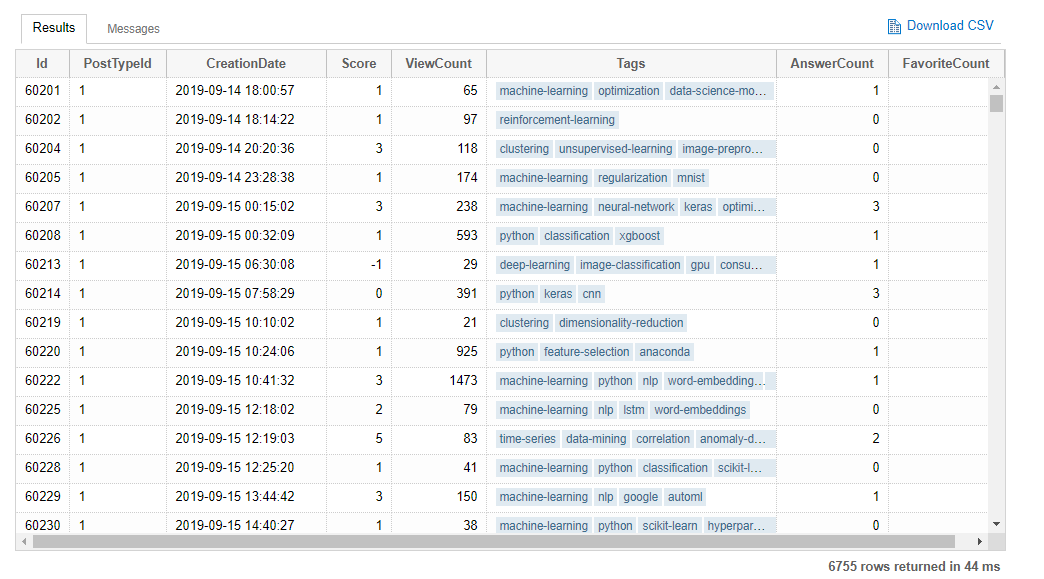
  
### Exploring the Data

The result of the query was stored in a file called `QueryResults.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

results = pd.read_csv('QueryResults.csv', parse_dates=['CreationDate'])

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6755 entries, 0 to 6754
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6755 non-null   int64         
 1   PostTypeId     6755 non-null   int64         
 2   CreationDate   6755 non-null   datetime64[ns]
 3   Score          6755 non-null   int64         
 4   ViewCount      6755 non-null   int64         
 5   Tags           6755 non-null   object        
 6   AnswerCount    6755 non-null   int64         
 7   FavoriteCount  160 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 422.3+ KB


In [2]:
results.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60201,1,2019-09-14 18:00:57,1,65,<machine-learning><optimization><data-science-...,1,NaN
1,60202,1,2019-09-14 18:14:22,1,97,<reinforcement-learning>,0,NaN
2,60204,1,2019-09-14 20:20:36,3,118,<clustering><unsupervised-learning><image-prep...,0,NaN
3,60205,1,2019-09-14 23:28:38,1,174,<machine-learning><regularization><mnist>,0,NaN
4,60207,1,2019-09-15 00:15:02,3,238,<machine-learning><neural-network><keras><opti...,3,NaN


There are 6755 entries. All columns have 6755 non-null values but FavoriteCount column which has only 160 non-null values.
We can change these NaN values to 0.
All types seems to be correct. FavoriteCount could be an int type instead of float.
We can transform the tags columns from <tag1><tag2> to tag1, tag2.
    
### Cleaning Data

In [3]:
results['FavoriteCount'] = results['FavoriteCount'].fillna(0)
results['FavoriteCount'] = results['FavoriteCount'].astype(int)
results.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60201,1,2019-09-14 18:00:57,1,65,<machine-learning><optimization><data-science-...,1,0
1,60202,1,2019-09-14 18:14:22,1,97,<reinforcement-learning>,0,0
2,60204,1,2019-09-14 20:20:36,3,118,<clustering><unsupervised-learning><image-prep...,0,0
3,60205,1,2019-09-14 23:28:38,1,174,<machine-learning><regularization><mnist>,0,0
4,60207,1,2019-09-15 00:15:02,3,238,<machine-learning><neural-network><keras><opti...,3,0


In [4]:
results['Tags'].value_counts

<bound method IndexOpsMixin.value_counts of 0       <machine-learning><optimization><data-science-...
1                                <reinforcement-learning>
2       <clustering><unsupervised-learning><image-prep...
3               <machine-learning><regularization><mnist>
4       <machine-learning><neural-network><keras><opti...
                              ...                        
6750                              <python><data-cleaning>
6751                              <neural-network><keras>
6752             <machine-learning><r><feature-selection>
6753     <machine-learning><normalization><data-analysis>
6754    <classification><feature-selection><multiclass...
Name: Tags, Length: 6755, dtype: object>

In [5]:
results['Tags'] = results['Tags'].str.replace('<','').str.replace('>',',').str[:-1].str.split(',')
results.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60201,1,2019-09-14 18:00:57,1,65,"[machine-learning, optimization, data-science-...",1,0
1,60202,1,2019-09-14 18:14:22,1,97,[reinforcement-learning],0,0
2,60204,1,2019-09-14 20:20:36,3,118,"[clustering, unsupervised-learning, image-prep...",0,0
3,60205,1,2019-09-14 23:28:38,1,174,"[machine-learning, regularization, mnist]",0,0
4,60207,1,2019-09-15 00:15:02,3,238,"[machine-learning, neural-network, keras, opti...",3,0


In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6755 entries, 0 to 6754
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6755 non-null   int64         
 1   PostTypeId     6755 non-null   int64         
 2   CreationDate   6755 non-null   datetime64[ns]
 3   Score          6755 non-null   int64         
 4   ViewCount      6755 non-null   int64         
 5   Tags           6755 non-null   object        
 6   AnswerCount    6755 non-null   int64         
 7   FavoriteCount  6755 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(5), object(1)
memory usage: 395.9+ KB


### Most popular tags: Most Used and Most Viewed

We need to count how many times the tag was used and how many times a question with this tag was viewed.

In [7]:
dict_tags = {}

def countTags(tag):
    for t in tag:
        if t in dict_tags:
            dict_tags[t] += 1
        else:
            dict_tags[t] = 1

results['Tags'].apply(countTags)

dict_tags_df = pd.DataFrame.from_dict(dict_tags, orient='index')
dict_tags_df.rename(columns={0: "Count"}, inplace=True)
dict_tags_df.sort_values('Count', ascending = False, inplace=True)
dict_tags_df.head(10)

,Count
machine-learning,2127
python,1439
deep-learning,895
neural-network,823
keras,705
classification,577
scikit-learn,448
nlp,443
tensorflow,412
cnn,378


The most popular tags are machine-learning (2042 posts), python (1377 posts) and deep-learning (816 posts).

In [8]:
dict_tags_views = {}

def countViews(row):
    tag = row['Tags']
    views = row['ViewCount']
    for t in tag:
        if t in dict_tags_views:
            dict_tags_views[t] += views
        else:
            dict_tags_views[t] = views

results.apply(countViews, axis=1)

dict_tags_views_df = pd.DataFrame.from_dict(dict_tags_views, orient='index')
dict_tags_views_df.rename(columns={0: "Views"}, inplace=True)
dict_tags_views_df.sort_values('Views', ascending = False, inplace=True)
dict_tags_views_df.head(10)

,Views
python,3502243
machine-learning,2467140
pandas,1650773
keras,1484703
deep-learning,1384958
neural-network,1285380
scikit-learn,941679
tensorflow,794444
classification,699531
dataframe,583583


The most viewed tags are python (3359855 views), machine-learning (2410143 views) and deep-learning (1333856 posts).

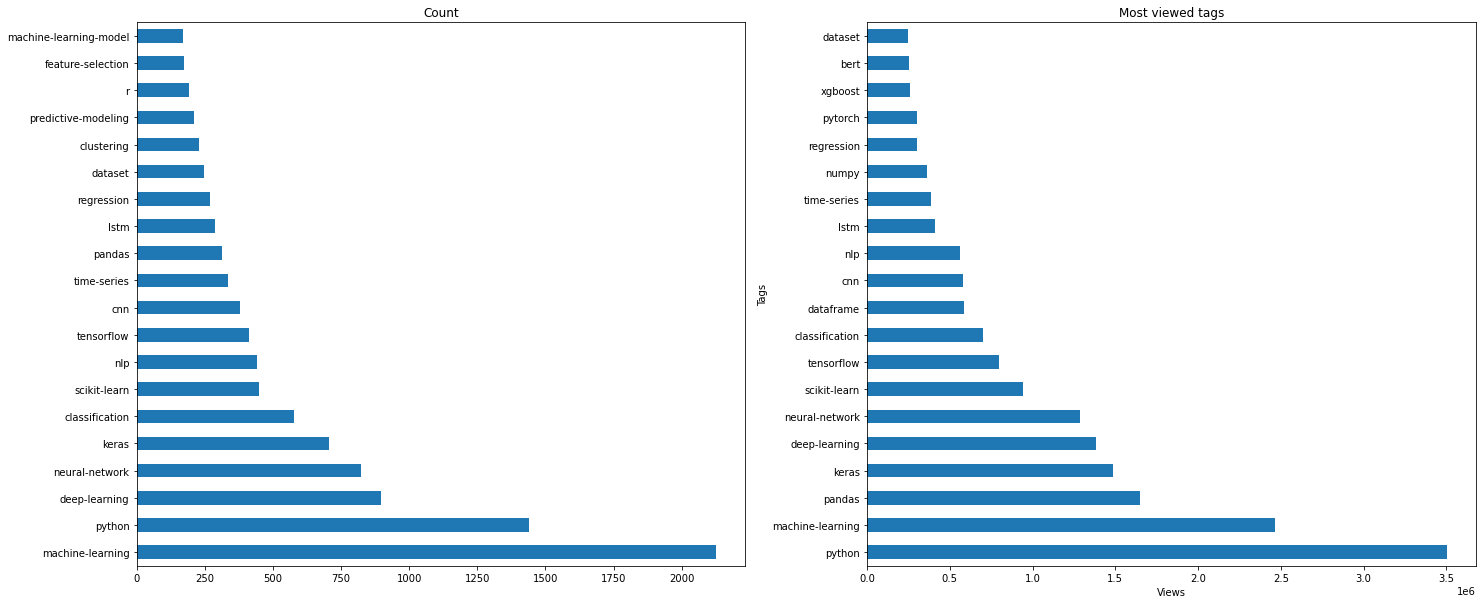

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,10))



dict_tags_df.head(20).plot.barh(subplots=True, ax=ax[0], legend=None)
plt.title('Most popular tags')
plt.xlabel('Posts')
plt.ylabel('Tags')


dict_tags_views_df.head(20).plot.barh(subplots=True, ax=ax[1], legend=None)
plt.title('Most viewed tags')
plt.xlabel('Views')
plt.ylabel('Tags')

plt.show()

In [10]:
tags = pd.merge(left=dict_tags_df, right=dict_tags_views_df, how='left', left_index=True, right_index=True)
tags

,Count,Views
machine-learning,2127,2467140
python,1439,3502243
deep-learning,895,1384958
neural-network,823,1285380
keras,705,1484703
...,...,...
lime,1,517
corpus,1,91
.net,1,821
c++,1,513


In [11]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, machine-learning to history
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   490 non-null    int64
 1   Views   490 non-null    int64
dtypes: int64(2)
memory usage: 27.6+ KB


### Relations Between Tags
Let's start thinking how tags can be related between them. We can check row by row when there are several tags per post if it is common to see them together.

In [12]:
all_tags = pd.DataFrame (index = tags.index, columns = tags.index)

all_tags.fillna(0, inplace=True)

all_tags

,machine-learning,python,deep-learning,neural-network,keras,classification,scikit-learn,nlp,tensorflow,cnn,...,aws-lambda,spearmans-rank-correlation,functional-api,kendalls-tau-coefficient,partial-least-squares,lime,corpus,.net,c++,history
machine-learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
python,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deep-learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neural-network,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keras,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
corpus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.net,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c++,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def countRelatedTags(tags):
    if len(tags) > 1:
        for t1 in tags:
            for t2 in tags:
                if t1 != t2:
                    all_tags.loc[t1,t2] += 1
        
results['Tags'].apply(countRelatedTags)

all_tags

,machine-learning,python,deep-learning,neural-network,keras,classification,scikit-learn,nlp,tensorflow,cnn,...,aws-lambda,spearmans-rank-correlation,functional-api,kendalls-tau-coefficient,partial-least-squares,lime,corpus,.net,c++,history
machine-learning,0,401,325,292,147,221,161,108,68,95,...,0,0,0,0,0,0,0,1,0,0
python,401,0,107,108,204,83,199,67,120,46,...,0,0,0,0,0,1,0,0,0,0
deep-learning,325,107,0,244,196,50,12,69,103,120,...,0,0,0,0,0,0,0,0,0,0
neural-network,292,108,244,0,192,54,20,27,81,96,...,0,0,0,0,0,0,0,0,0,0
keras,147,204,196,192,0,48,26,20,196,93,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lime,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
corpus,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
.net,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c++,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
related_tags = {}

def relatedTags(row):
    t = row.name
    values = row.sort_values(ascending = False).head(5)
    cont = 0
    for v in values:
        tag_name = values.index[cont]
        if v !=0:
            if t in related_tags:
                related_tags[t] = related_tags[t] +', ' + tag_name
            else:
                related_tags[t] = tag_name
        cont += 1


all_tags.apply(relatedTags)

related_tags_df = pd.DataFrame.from_dict(related_tags, orient='index')
related_tags_df.rename(columns={0: "Related Tags"}, inplace=True)
related_tags_df.head(10)

,Related Tags
machine-learning,"python, deep-learning, neural-network, classif..."
python,"machine-learning, pandas, keras, scikit-learn,..."
deep-learning,"machine-learning, neural-network, keras, cnn, ..."
neural-network,"machine-learning, deep-learning, keras, python..."
keras,"python, deep-learning, tensorflow, neural-netw..."
classification,"machine-learning, python, neural-network, deep..."
scikit-learn,"python, machine-learning, classification, regr..."
nlp,"machine-learning, deep-learning, python, word-..."
tensorflow,"keras, python, deep-learning, neural-network, ..."
cnn,"deep-learning, neural-network, machine-learnin..."


<AxesSubplot:>

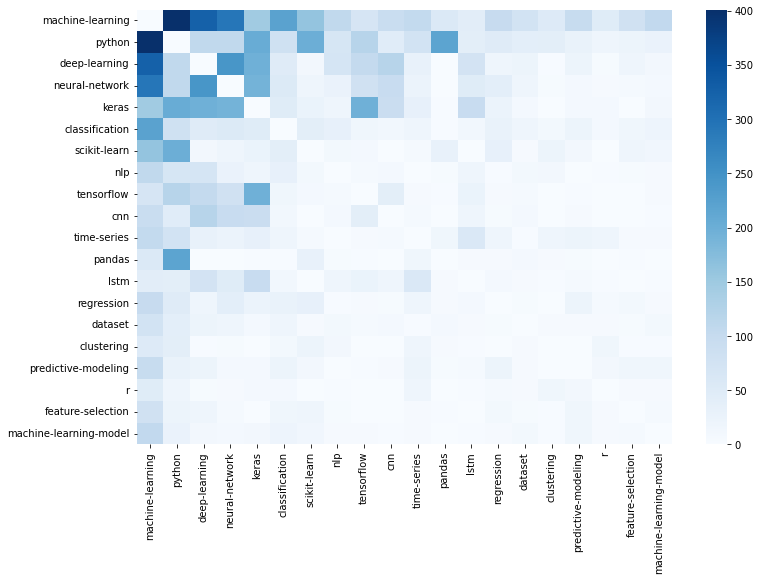

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(all_tags.iloc[0:20,0:20], cmap="Blues")

### Enter Domain Knowledge

We can see `machine-learning`, `python`, `deep-learning`, `neural-network` and `keras` are strongly related to each other.

We can see an obvious relation between `python` and `pandas` as this last one is a library of `python`.

`tensorflow` is also a `machine-learning` `python` library and it is related to `keras` due it is a part of it. `keras` is an API used in `deep-learning`.

`deep-learning` is a `machine-learning` technique that teaches computers to do what comes naturally to humans. Artificial `neural-network`s (ANNs) are computing systems inspired by the biological neural networks that constitute animal brains.

We can suppose that the most popular questions are about `python` content (code and libraries) to use it with `machine-learning` techniques as `deep-learning` and `neural-newtwork`s.

### Just a Fad?

"Is deep learning just a fad?" We can see how the interest in `deep-learning` evolve across time.

*SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;*
 

In [16]:
deeplearning = pd.read_csv('deeplearningtime.csv', parse_dates=['CreationDate'])
deeplearning['Tags'] = deeplearning['Tags'].str.replace('<','').str.replace('>',',').str[0:-1].str.split(',')

def isDeepLearning(tags):
    for t in tags:
        if t in ['deep-learning', 'neural-network', 'keras', 'tensorflow']:
            return True
    return False

deeplearning['deep-learning'] = deeplearning['Tags'].apply(isDeepLearning)
deeplearning.head()

,Id,CreationDate,Tags,deep-learning
0,5,2014-05-13 23:58:30,[machine-learning],False
1,7,2014-05-14 00:11:06,"[education, open-source]",False
2,14,2014-05-14 01:25:59,"[data-mining, definitions]",False
3,15,2014-05-14 01:41:23,[databases],False
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]",False


In [17]:
deeplearning['deep-learning'].value_counts()

False    25161
True      9597
Name: deep-learning, dtype: int64

In [18]:
deeplearning['CreationDate'].sort_values()

0       2014-05-13 23:58:30
1       2014-05-14 00:11:06
2       2014-05-14 01:25:59
3       2014-05-14 01:41:23
4       2014-05-14 01:57:56
                ...        
31792   2022-10-29 16:31:26
31793   2022-10-29 16:58:33
31794   2022-10-29 17:21:41
31795   2022-10-30 02:27:56
31796   2022-10-30 03:22:09
Name: CreationDate, Length: 34758, dtype: datetime64[ns]

There are 9597 that we can consider as `deep-learning` post.

We have information from 2014-05-13 to 2022-10-30 and we focus our study in 2019. We are going to divise the year in period of 3 months.

- January, February, March - Q1
- April, May, June - Q2
- July, August, September - Q3
- October, November, December - Q4

Due to we do not have all data about Q4 in 2022, we can ignore them.

In [19]:
deeplearning = deeplearning[deeplearning['CreationDate'] < '2022-10-01']
deeplearning['CreationDate'].sort_values()

0       2014-05-13 23:58:30
1       2014-05-14 00:11:06
2       2014-05-14 01:25:59
3       2014-05-14 01:41:23
4       2014-05-14 01:57:56
                ...        
30284   2022-09-30 16:59:05
30285   2022-09-30 17:00:58
30447   2022-09-30 20:57:15
30448   2022-09-30 21:16:23
30449   2022-09-30 23:14:59
Name: CreationDate, Length: 34276, dtype: datetime64[ns]

In [20]:
deeplearning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34276 entries, 0 to 34757
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             34276 non-null  int64         
 1   CreationDate   34276 non-null  datetime64[ns]
 2   Tags           34276 non-null  object        
 3   deep-learning  34276 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [21]:
def determineQ (date):
    year = date.year - 2000
    year_str = str(year)
    month = date.month  
    if month >= 1 and month <= 3:
        return year_str + 'Q1'   
    elif month >= 4 and month <= 6:
        return year_str + 'Q2'
    elif month >= 7 and month <= 9:
        return year_str + 'Q3'
    elif month >= 9 and month <= 12:
        return year_str + 'Q4'
    
deeplearning['Quarter'] = deeplearning['CreationDate'].apply(determineQ)

deeplearning.head()

,Id,CreationDate,Tags,deep-learning,Quarter
0,5,2014-05-13 23:58:30,[machine-learning],False,14Q2
1,7,2014-05-14 00:11:06,"[education, open-source]",False,14Q2
2,14,2014-05-14 01:25:59,"[data-mining, definitions]",False,14Q2
3,15,2014-05-14 01:41:23,[databases],False,14Q2
4,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]",False,14Q2


Now, we can count how many deep learning questions are asked per time period, the total amount of questions per time period and how many deep learning questions there are relative to the total amount of questions per time period.

In [22]:
dl_quarter = deeplearning.groupby('Quarter').agg({'deep-learning' : ['sum', 'size']})
dl_quarter.columns = ['Deep Learning Questions', 'Total Questions']
dl_quarter['Ratio DL/Total Questions'] = dl_quarter['Deep Learning Questions'] / dl_quarter['Total Questions']
dl_quarter

,Deep Learning Questions,Total Questions,Ratio DL/Total Questions
Quarter,,,
14Q2,7,157,0.044586
14Q3,8,188,0.042553
14Q4,15,214,0.070093
15Q1,13,188,0.069149
15Q2,20,284,0.070423
15Q3,28,310,0.090323
15Q4,52,379,0.137203
16Q1,79,510,0.154902
16Q2,78,510,0.152941


Text(0, 0.5, 'Number of questions')

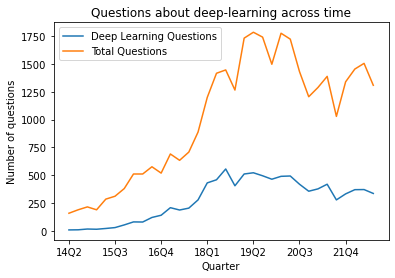

In [23]:
dl_quarter[['Deep Learning Questions', 'Total Questions']].plot.line()
plt.title('Questions about deep-learning across time')
plt.ylabel('Number of questions')

Text(0, 0.5, 'Ratio')

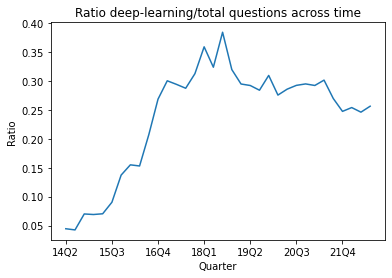

In [24]:
dl_quarter['Ratio DL/Total Questions'].plot.line()
plt.title('Ratio deep-learning/total questions across time')
plt.ylabel('Ratio')

The number of `deep-learning` questions shows an exponential increase from 2014 to 2019. From 2019, the ratio seems to be stabilise and show a very weak decrease but these questions still represent the 25% of total.

`deep-learning` could be a good content to write about.